In [1]:
using JLD2
include("MDPModelFunctions2.jl")
using PythonPlot

    CondaPkg Found dependencies: /Users/erussek/.julia/packages/PythonCall/wXfah/CondaPkg.toml
    CondaPkg Found dependencies: /Users/erussek/.julia/packages/PythonPlot/KcWMF/CondaPkg.toml
    CondaPkg Dependencies already up to date


In [122]:
function sim_tanoue_exp1(epsilon, N_Quanta, NT_per_Second; mem_slope = .1, return_last_only=true, N_Trials = 1000)

    N_Objects = 4
    N_TimeSteps_Pre = Int(round(1*NT_per_Second))
    N_TimeSteps_Post_all = [Int(round(x*NT_per_Second)) for x in .1:.1:.7]

    N_TimeSteps_all = N_TimeSteps_Pre .+ N_TimeSteps_Post_all

    p_neutral = simulate_task(N_Quanta, N_Objects, epsilon, N_TimeSteps_all[end], 0, N_Trials, simulate_delayed_memory_episode; mem_slope = mem_slope);
    p_retro = simulate_task(N_Quanta, N_Objects, epsilon, N_TimeSteps_Pre, N_TimeSteps_Post_all[end], N_Trials, simulate_retrocue_episode; mem_slope = mem_slope);

    p_neutral_res = p_neutral[N_TimeSteps_all,1]
    p_retro_res = p_retro[N_TimeSteps_all,1]
    
    return [p_neutral_res; p_retro_res]
    
end

sim_tanoue_exp1 (generic function with 1 method)

In [119]:
p_neutral_res

LoadError: UndefVarError: `p_neutral_res` not defined

In [2]:
eps_vals = collect(1:-.02:.02) # 17

NT_per_Second = 2400

# quanta values
q_vals = collect(2:1:50) # could go to one... 

N_Quanta = 10
epsilon = .5#eps_vals[3]
mem_slope = .2

sim_tanoue_exp1(epsilon, N_Quanta, NT_per_Second; mem_slope = mem_slope, return_last_only=true, N_Trials = 1000)

14-element Vector{Float64}:
 0.6332059501033563
 0.6329972979830416
 0.6328745193379021
 0.632466311858731
 0.630226816084318
 0.631441873661074
 0.6300600342535546
 0.6824442552370772
 0.6824442552370772
 0.6824442552370772
 0.6824442552370772
 0.6824442552370772
 0.6824442552370772
 0.6824442552370772

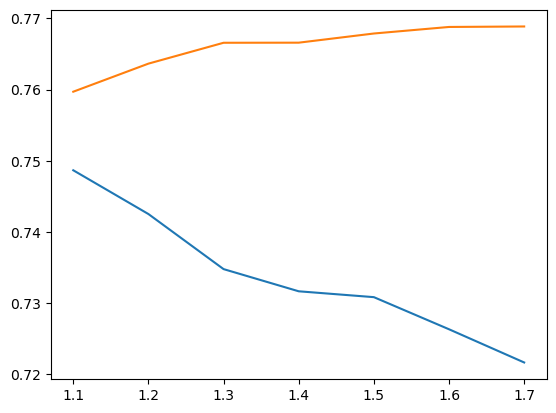

Python: [<matplotlib.lines.Line2D object at 0x32687d550>]

In [120]:
fig,ax = subplots(1)

N_Quanta = 40
epsilon = .95
mem_slope = .2

N_Trials = 1000

N_Objects = 4
N_TimeSteps_Pre = Int(round(1*NT_per_Second))
N_TimeSteps_Post_all = [Int(round(x*NT_per_Second)) for x in .1:.1:.7]

N_TimeSteps_all = N_TimeSteps_Pre .+ N_TimeSteps_Post_all

p_neutral = simulate_task(N_Quanta, N_Objects, epsilon, N_TimeSteps_all[end], 0, N_Trials, simulate_delayed_memory_episode; mem_slope = mem_slope);
p_retro = simulate_task(N_Quanta, N_Objects, epsilon, N_TimeSteps_Pre, N_TimeSteps_Post_all[end], N_Trials, simulate_retrocue_episode; mem_slope = mem_slope);

p_neutral_res = p_neutral[N_TimeSteps_all,1]
p_retro_res = p_retro[N_TimeSteps_all,1]
# should be able to just sim once up to 700 and grab the relevant items...


ax.plot(N_TimeSteps_all ./ NT_per_Second, p_neurtral_res)
ax.plot(N_TimeSteps_all ./ NT_per_Second, p_retro_res, label = "")


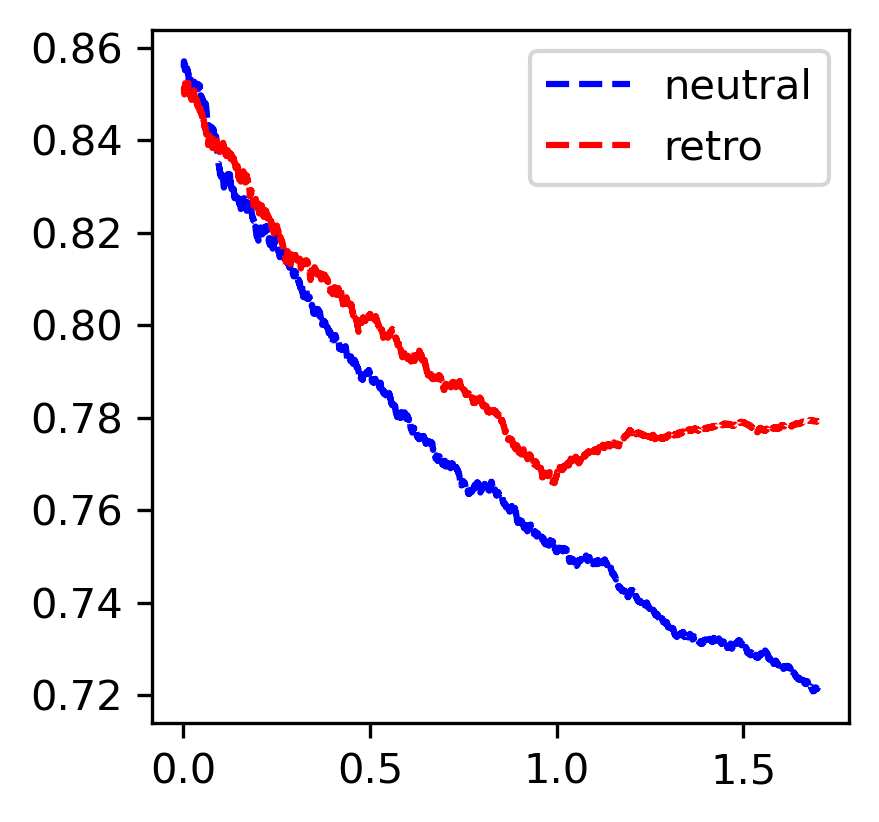

Python: <matplotlib.legend.Legend object at 0x2a74e1190>

In [118]:
fig,ax = subplots(1, dpi = 300, figsize=(3,3))
ax.plot((1:N_TimeSteps_all[end])./NT_per_Second, p_neutral[:,1], "--", label = "neutral", color = "blue")
ax.plot((1:N_TimeSteps_all[end])./NT_per_Second, p_retro[:,1], "--",label = "retro", color = "red")
# ax.plot(N_TimeSteps_all ./ NT_per_Second, p_neurtral_res, 'o', color = "blue")
# ax.plot(N_TimeSteps_all ./ NT_per_Second, p_retro_res,  'o', color = "red")

ax.legend()

In [49]:
.1:.1:.7

0.1:0.1:0.7

In [50]:
N_Trials

1000

In [20]:
size(p_neutral)

(1360, 4)

In [22]:
size(p_retro)

(1360, 4)

In [36]:
epsilon

0.96